In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tables
from phd.utils.path_tools import find_by_meta
from tabulate import tabulate
from scipy.stats import describe

In [22]:
path = "/mnt/storage2/phd/data/thunderstorm/diffModels/result_1_1e4.hdf5"
# path = "/home/zelenyy/temp/phd-run/result.hdf5"


In [10]:
with tables.open_file(path) as h5file:
    table = h5file.get_node("/sim0001", "electron")
    print(repr(table.attrs))

/sim0001/electron._v_attrs (AttributeSet), 25 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0.0,
    FIELD_0_NAME := 'energy',
    FIELD_1_FILL := 0.0,
    FIELD_1_NAME := 'theta',
    FIELD_2_FILL := 0.0,
    FIELD_2_NAME := 'radius',
    FIELD_3_FILL := 0.0,
    FIELD_3_NAME := 'z',
    NROWS := 753,
    TITLE := '',
    VERSION := '2.7',
    path := 'sim0001',
    text := '/df/project test\n/df/gdml .././gdml/0.gdml\n/thunderstorm/physics standard\n/thunderstorm/stacking one_generation\n\n/gps/particle e-\n/gps/number 1\n/gps/direction 0 0 -1\n/gps/ene/mono 10 MeV\n/gps/position 0. 0. 299.9 m\n/run/beamOn 100\n',
    values_gdml_cellHeight := 600,
    values_gdml_fieldValueZ := 0,
    values_gdml_height := 0,
    values_macros_direction := '0 0 -1',
    values_macros_energy := 10,
    values_macros_number := 100,
    values_macros_particle := 'e-',
    values_macros_path := '.././gdml/0.gdml',
    values_macros_physics := 'standard',
    values_macros_posZ := 299.9,
    valu

In [15]:
stat_dtype = np.dtype(
    [   
        ("model", "U25"),
        ("number", "d"),
        ("min", "d"),
        ("max", "d"),
        ("mean", "d"),
        ("variance", "d"),
        ("median", "d"),
        ("time", "d")
    ]
)

def compare_physics(path, field=0.0, target_node="electron"):
    print(f"Electric field: {field}")
    
    print(f"Secondary particle: {target_node}")
    paths = find_by_meta(path,target_node=target_node, values_gdml_fieldValueZ=field)
    labels = []
    desc = np.zeros(len(paths), dtype=stat_dtype)
    plt.figure(figsize=(10,10))
    first = True
    with tables.open_file(path) as h5file:
        for indx, node_path in enumerate(paths):
            table = h5file.get_node(node_path)
            if first:
                first = False
                print("Primry particle: {}".format(table.attrs["values_macros_particle"]))
            phys = table.attrs["values_macros_physics"]
            data = table.read()
            labels.append(phys)

            plt.subplot(221)
            plt.title("Heigth distribution")
            plt.hist(data["z"], histtype="step", label=phys)
            plt.subplot(222)
            plt.title("Theta distribution")
            plt.hist(data["theta"], histtype="step", label=phys)
            plt.subplot(223)
            plt.title("Radius distribution")
            plt.hist(data["radius"], histtype="step", label=phys)
            item = describe(data["energy"])
            desc[indx]["model"] = phys
            desc[indx]["min"] = item.minmax[0]
            desc[indx]["max"] = item.minmax[1]
            desc[indx]["mean"] = item.mean
            desc[indx]["variance"] = item.variance
            desc[indx]["number"] = float(len(data))/table.attrs["values_macros_number"]
            desc[indx]["time"] = table.attrs["values_time"]
            desc[indx]["median"] = np.median(data["energy"])
    print(tabulate(desc, headers=desc.dtype.names))  
    plt.legend();

# Электроны
## Вторичные электроны

Electric field: 0.0
Secondary particle: electron
Primry particle: e-
model             number        min      max      mean    variance     median     time
--------------  --------  ---------  -------  --------  ----------  ---------  -------
standard          7.8308  0.0500002  4.86441  0.199799    0.113353  0.0960422  45.1466
standard_opt_1    7.8144  0.0500001  4.81721  0.202513    0.117878  0.0967165  44.4146
standard_opt_2    7.8067  0.0500008  4.89437  0.200402    0.116139  0.0963104  41.2387
standard_opt_3    7.8254  0.0500013  4.83283  0.201939    0.117408  0.0960461  51.488
standard_opt_4    7.853   0.0500001  4.90116  0.198877    0.110607  0.0960065  58.5796
penelopa          7.8514  0.0500002  4.91631  0.200446    0.115871  0.0954674  85.657
livermore         7.8602  0.0500001  4.84421  0.201897    0.11308   0.0967141  58.2025
emlowepphysics    7.8534  0.0500001  4.9214   0.199729    0.112312  0.0959469  60.9905


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

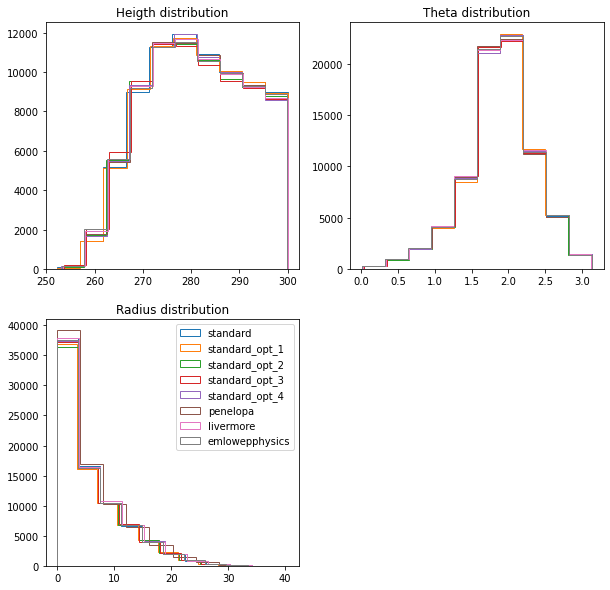

In [16]:
path = "/mnt/storage2/phd/data/thunderstorm/diffModels/electron_0_1e4.hdf5"
compare_physics(path, 0.0)

Electric field: 0.0003
Secondary particle: electron
Primry particle: e-
model             number        min      max      mean    variance     median      time
--------------  --------  ---------  -------  --------  ----------  ---------  --------
standard         111.318  0.05       14.3907  0.254821    0.327212  0.09943     587.348
standard_opt_1   111.358  0.05       14.5471  0.25469     0.324168  0.0993817   586.783
standard_opt_2   110.972  0.0500001  14.6175  0.255209    0.328812  0.0994832   559.727
standard_opt_3   110.59   0.0500001  14.6215  0.254806    0.327668  0.0993728   657.735
standard_opt_4   112.702  0.05       13.8542  0.25451     0.326968  0.0993728   713.611
penelopa         112.641  0.05       13.6686  0.253567    0.31972   0.0994754  1170.3
livermore        112.175  0.05       14.0345  0.253676    0.321943  0.0992889   691.082
emlowepphysics   112.881  0.0500001  15.7203  0.254604    0.325783  0.0994748   724.151


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

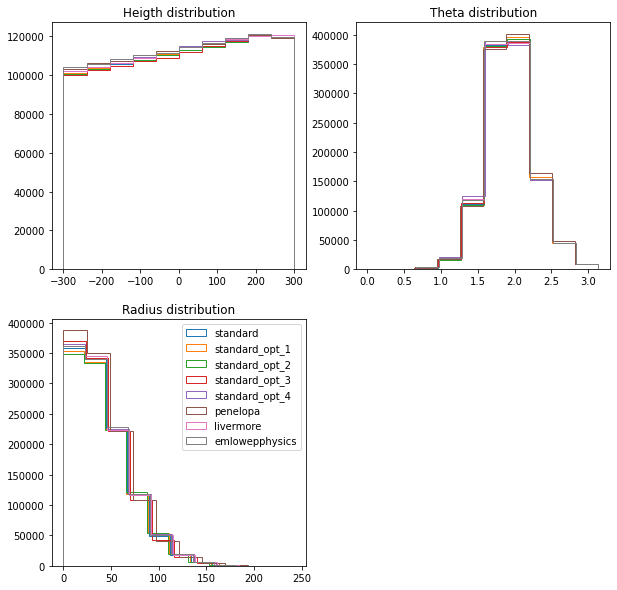

In [17]:
compare_physics(path, 3e-4)

Electric field: 0.001
Secondary particle: electron
Primry particle: e-
model             number        min      max      mean    variance     median      time
--------------  --------  ---------  -------  --------  ----------  ---------  --------
standard         113.059  0.0500001  146.401  0.370396     4.10339  0.0999373  5604.6
standard_opt_1   112.93   0.05       179.78   0.36831      4.10318  0.0998873  5054.16
standard_opt_2   112.885  0.0500001  162.482  0.369764     4.15494  0.0998465  4087.76
standard_opt_3   113.191  0.05       140.903  0.370142     4.10878  0.0999288   738.523
standard_opt_4   113.27   0.05       161.156  0.369207     4.149    0.0999401   753.371
penelopa         112.782  0.0500001  170.67   0.368543     4.06478  0.10007    1394.35
livermore        113.178  0.05       183.861  0.372704     4.30567  0.0999716   737.589
emlowepphysics   113.25   0.05       162.677  0.371342     4.30262  0.100073    696.87


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

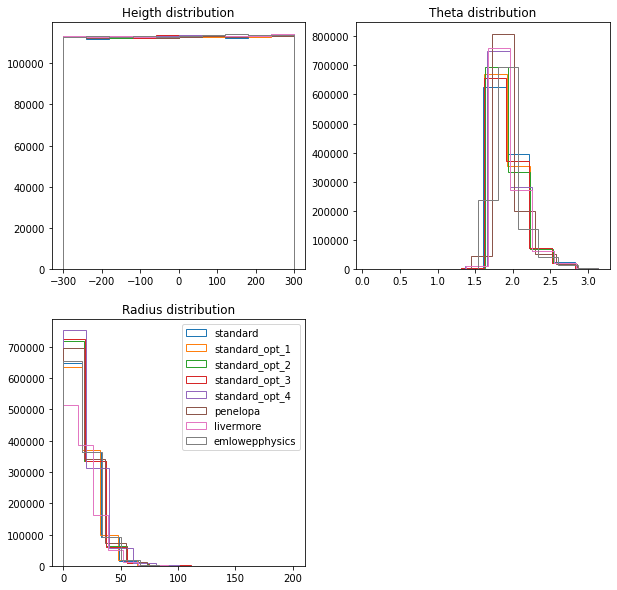

In [18]:
compare_physics(path, 10e-4)

## Вторичная гамма

Electric field: 0.0
Secondary particle: gamma
Primry particle: e-
model             number        min      max      mean    variance    median     time
--------------  --------  ---------  -------  --------  ----------  --------  -------
standard          0.5899  0.0500371  9.76974  0.697909     1.23877  0.259958  45.1466
standard_opt_1    0.5797  0.0500015  8.02913  0.711014     1.21963  0.258244  44.4146
standard_opt_2    0.5845  0.0500446  9.41033  0.693602     1.28656  0.241461  41.2387
standard_opt_3    0.5889  0.0500194  8.72934  0.696735     1.22115  0.244746  51.488
standard_opt_4    0.5958  0.0500047  9.45602  0.67772      1.0999   0.255894  58.5796
penelopa          0.5651  0.0500099  9.44158  0.691915     1.18141  0.259517  85.657
livermore         0.5864  0.050014   9.44068  0.691512     1.24839  0.249407  58.2025
emlowepphysics    0.5914  0.0500058  9.40165  0.692206     1.20352  0.24941   60.9905


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

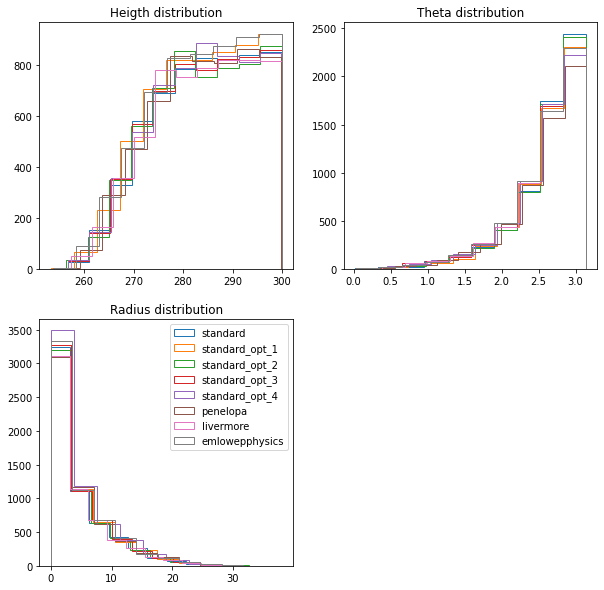

In [19]:
compare_physics(path, 0.0, target_node="gamma")

Electric field: 0.0003
Secondary particle: gamma
Primry particle: e-
model             number        min      max     mean    variance    median      time
--------------  --------  ---------  -------  -------  ----------  --------  --------
standard         11.794   0.0500002  27.7621  1.38825     5.74161  0.407522   587.348
standard_opt_1   11.7725  0.050002   29.2741  1.39495     5.78758  0.410095   586.783
standard_opt_2   11.755   0.0500001  30.4821  1.39485     5.82786  0.405952   559.727
standard_opt_3   11.6763  0.0500003  26.9755  1.39326     5.70721  0.40761    657.735
standard_opt_4   11.8672  0.0500005  26.5494  1.39156     5.73609  0.408372   713.611
penelopa         11.9166  0.050002   29.808   1.38756     5.60396  0.412782  1170.3
livermore        11.9024  0.0500002  25.3759  1.38726     5.67872  0.410932   691.082
emlowepphysics   11.9539  0.0500003  28.1745  1.38828     5.73917  0.409867   724.151


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

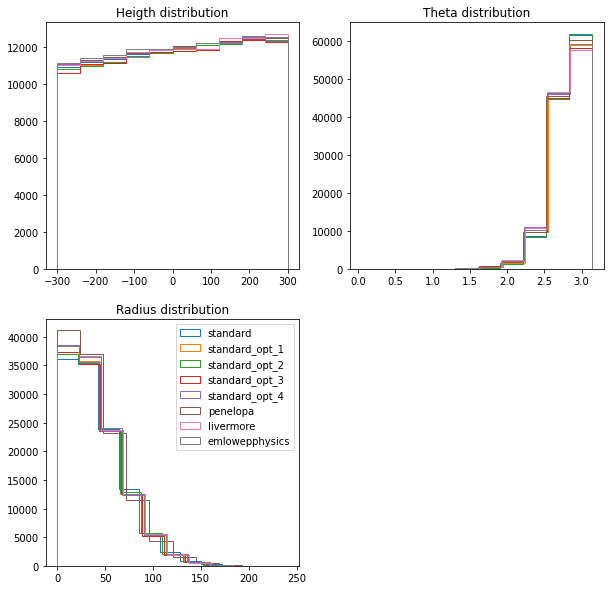

In [20]:
compare_physics(path, 3e-4, target_node="gamma")

Electric field: 0.001
Secondary particle: gamma
Primry particle: e-
model             number        min      max     mean    variance    median      time
--------------  --------  ---------  -------  -------  ----------  --------  --------
standard         19.7986  0.05       361.276  11.9284     774.246   1.3059   5604.6
standard_opt_1   19.7709  0.0500007  423.958  11.9185     769.929   1.33356  5054.16
standard_opt_2   19.7636  0.0500023  358.943  11.9775     776.771   1.33858  4087.76
standard_opt_3   19.7793  0.0500008  382.101  11.9894     789.459   1.3393    738.523
standard_opt_4   19.8183  0.0500017  370.87   11.9653     778.477   1.32136   753.371
penelopa         19.8036  0.0500019  364.044  11.9572     789.668   1.31705  1394.35
livermore        19.7652  0.0500007  384.887  11.957      786.637   1.32891   737.589
emlowepphysics   19.7428  0.0500005  386.08   11.9427     772.005   1.35027   696.87


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

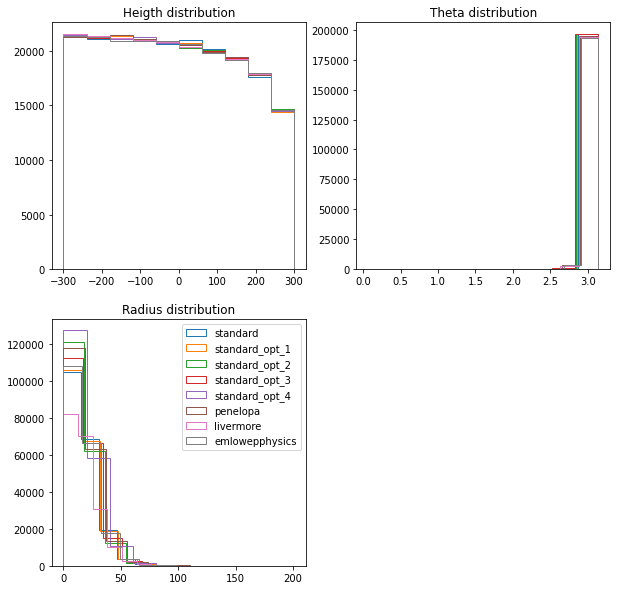

In [21]:
compare_physics(path, 10e-4, target_node="gamma")

# Гамма

Electric field: 0.0
Secondary particle: electron
Primry particle: gamma
model             number        min      max     mean    variance    median     time
--------------  --------  ---------  -------  -------  ----------  --------  -------
standard          2.0445  0.0500005  9.75013  2.79568     11.5138  0.733729  1.78619
standard_opt_1    2.0591  0.0500012  9.75085  2.82822     11.5033  0.777995  1.76622
standard_opt_2    2.0633  0.0500022  9.75084  2.8113      11.6241  0.734325  1.76194
standard_opt_3    2.0582  0.0500066  9.76408  2.82415     11.6265  0.758115  2.74089
standard_opt_4    2.0803  0.0500034  9.94475  2.8059      11.5417  0.747136  5.24775
penelopa          2.0464  0.0500056  9.99946  2.82253     11.6353  0.752397  3.40772
livermore         2.1304  0.0500015  9.76191  2.77595     11.5719  0.679109  5.34186
emlowepphysics    2.0946  0.0500063  9.75897  2.77927     11.4721  0.728247  5.22426


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

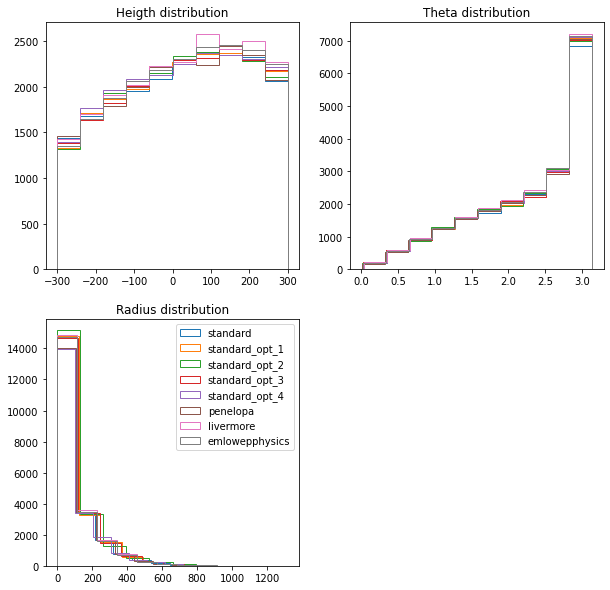

In [28]:
path = "/mnt/storage2/phd/data/thunderstorm/diffModels/gamma_0_1e4.hdf5"
compare_physics(path, 0.0)

Electric field: 0.0
Secondary particle: positron
Primry particle: gamma
model             number        min      max     mean    variance    median     time
--------------  --------  ---------  -------  -------  ----------  --------  -------
standard          0.2129  0.0506331  8.94062  4.34306     5.23938   4.20258  1.78619
standard_opt_1    0.2217  0.0526964  8.97764  4.23792     5.59388   4.12909  1.76622
standard_opt_2    0.2188  0.051898   8.96335  4.31383     5.56121   4.21452  1.76194
standard_opt_3    0.2204  0.0650227  8.96526  4.37985     5.28734   4.29444  2.74089
standard_opt_4    0.2135  0.0566097  8.94272  4.39787     5.36076   4.40981  5.24775
penelopa          0.2151  0.0550637  8.95641  4.32439     5.5278    4.21323  3.40772
livermore         0.2153  0.0871237  8.91706  4.28168     5.12136   4.18998  5.34186
emlowepphysics    0.2174  0.0601488  8.81579  4.30624     5.34471   4.22337  5.22426


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

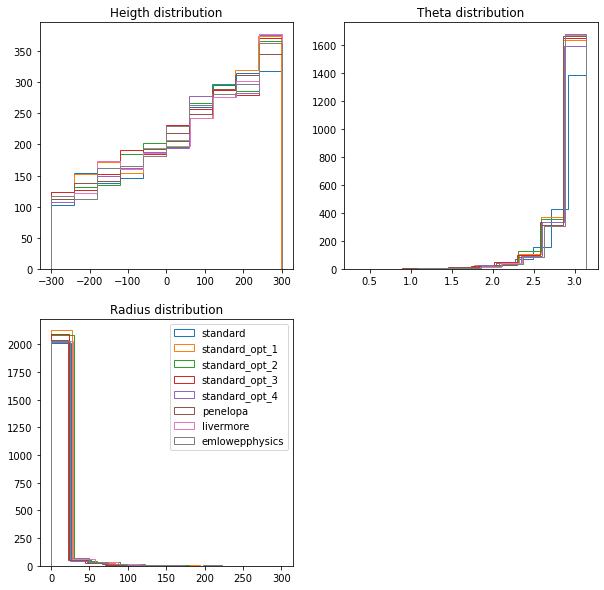

In [29]:
compare_physics(path, 0.0, target_node="positron")

# Позитроны
## Вторичные электроны

Electric field: 0.0
Secondary particle: electron
Primry particle: e+
model             number        min      max      mean    variance     median     time
--------------  --------  ---------  -------  --------  ----------  ---------  -------
standard          7.1533  0.0500001  9.83783  0.190589    0.154527  0.0921239  47.8668
standard_opt_1    7.0844  0.0500001  8.99939  0.18947     0.142128  0.0928792  46.9324
standard_opt_2    7.0818  0.0500001  9.397    0.186029    0.139828  0.0924211  44.2705
standard_opt_3    7.063   0.0500003  9.66892  0.19232     0.158604  0.0926621  52.0712
standard_opt_4    7.1139  0.050001   9.04838  0.186861    0.13366   0.092267   56.9655
penelopa          7.11    0.0500031  8.9113   0.189624    0.145002  0.0927882  85.1668
livermore         7.0986  0.0500001  9.49553  0.189324    0.143308  0.0923241  55.0522
emlowepphysics    7.1069  0.0500015  9.72784  0.187507    0.138969  0.0921946  58.2838


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

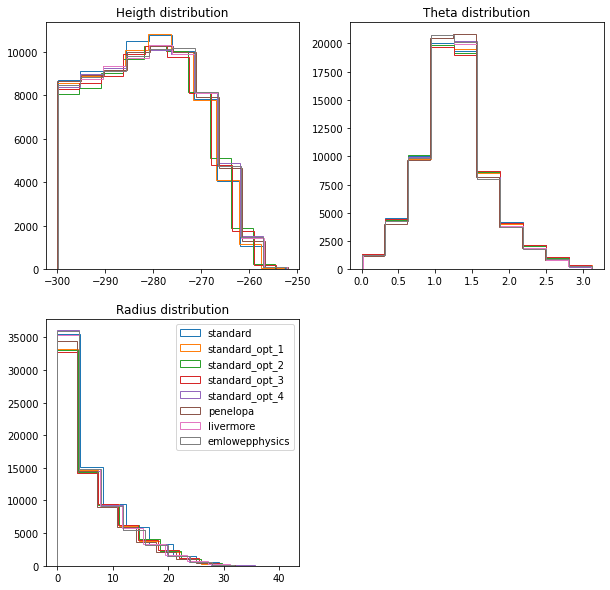

In [38]:
path = "/mnt/storage2/phd/data/thunderstorm/diffModels/positron_0_1e4.hdf5"
compare_physics(path, 0.0)

Electric field: 0.0003
Secondary particle: electron
Primry particle: e+
model             number        min      max      mean    variance     median     time
--------------  --------  ---------  -------  --------  ----------  ---------  -------
standard         70.9263  0.0500001  25.9684  0.236938    0.409701  0.0971492  416.178
standard_opt_1   70.933   0.05       32.8955  0.236355    0.398935  0.0971104  417.176
standard_opt_2   70.789   0.0500001  27.3934  0.236061    0.403089  0.0969587  394.091
standard_opt_3   70.2868  0.0500002  25.85    0.235852    0.398509  0.0968754  471.096
standard_opt_4   72.6623  0.0500002  30.5595  0.238373    0.420947  0.0969944  493.059
penelopa         72.6702  0.05       26.0761  0.236834    0.403177  0.0969402  842.313
livermore        72.473   0.0500001  26.5274  0.237398    0.42295   0.0968629  496.919
emlowepphysics   73.0366  0.05       26.0527  0.237096    0.412174  0.0969727  490.681


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

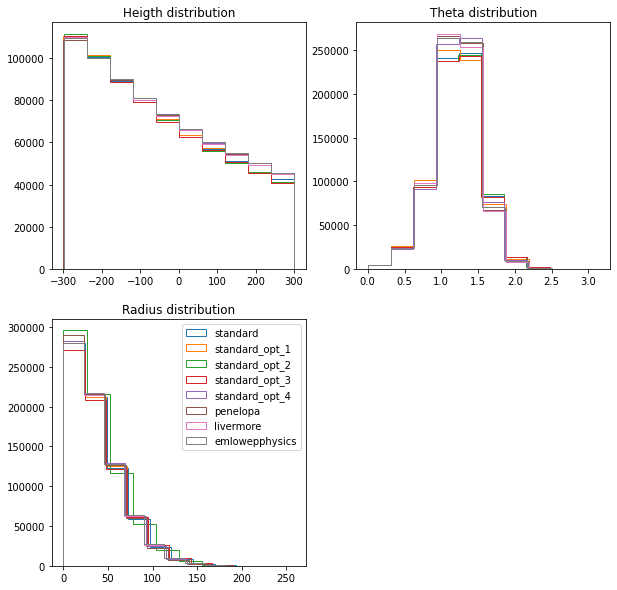

In [39]:
compare_physics(path, 3e-4)

Electric field: 0.001
Secondary particle: electron
Primry particle: e+
model             number        min      max      mean    variance     median      time
--------------  --------  ---------  -------  --------  ----------  ---------  --------
standard         101.726  0.05       262.459  0.340643     4.67971  0.0993336  3869.57
standard_opt_1   101.545  0.0500001  264.142  0.336824     4.29596  0.0994006  1270.64
standard_opt_2   102.33   0.05       315.94   0.340006     4.76361  0.0993138  2298.19
standard_opt_3   101.444  0.05       338.787  0.340527     4.47249  0.0993127   691.886
standard_opt_4   101.866  0.05       271.58   0.338096     4.15692  0.0994769   713.885
penelopa         101.317  0.05       260.143  0.340099     4.29541  0.099568   1298.12
livermore        101.427  0.05       218.572  0.340174     4.40323  0.0991944   668.303
emlowepphysics   100.659  0.05       313.618  0.340228     4.61522  0.0993639   633.975


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

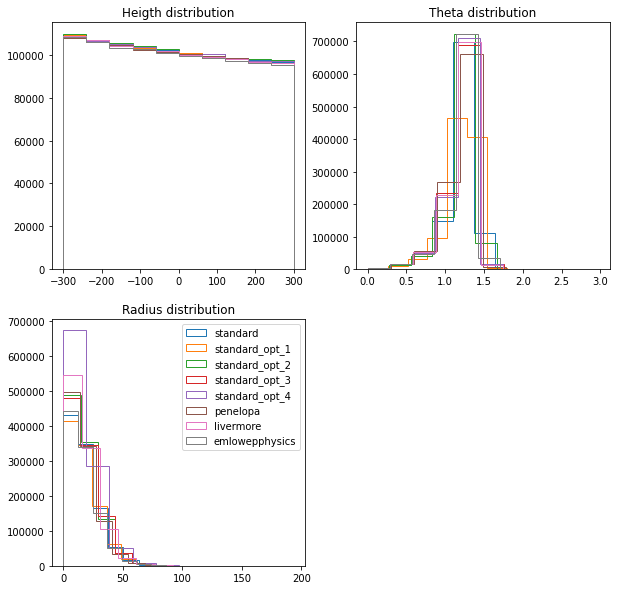

In [40]:
compare_physics(path, 10e-4)

    
## Вторичная гамма

Electric field: 0.0
Secondary particle: gamma
Primry particle: e+
model             number        min      max      mean    variance    median     time
--------------  --------  ---------  -------  --------  ----------  --------  -------
standard          2.579   0.0500122  10.6364  0.717921     1.0101   0.510999  47.8668
standard_opt_1    2.5799  0.0500151  10.6754  0.732367     1.09675  0.510999  46.9324
standard_opt_2    2.58    0.050007   10.6978  0.733753     1.06761  0.510999  44.2705
standard_opt_3    2.5872  0.0500271  10.6428  0.737657     1.12825  0.510999  52.0712
standard_opt_4    2.5759  0.050039   10.5982  0.730056     1.08416  0.510999  56.9655
penelopa          2.5717  0.0500242  10.5755  0.724459     1.04823  0.510999  85.1668
livermore         2.5821  0.050012   10.7174  0.721665     1.01207  0.510999  55.0522
emlowepphysics    2.5774  0.0500058  10.7126  0.72423      1.0491   0.510999  58.2838


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

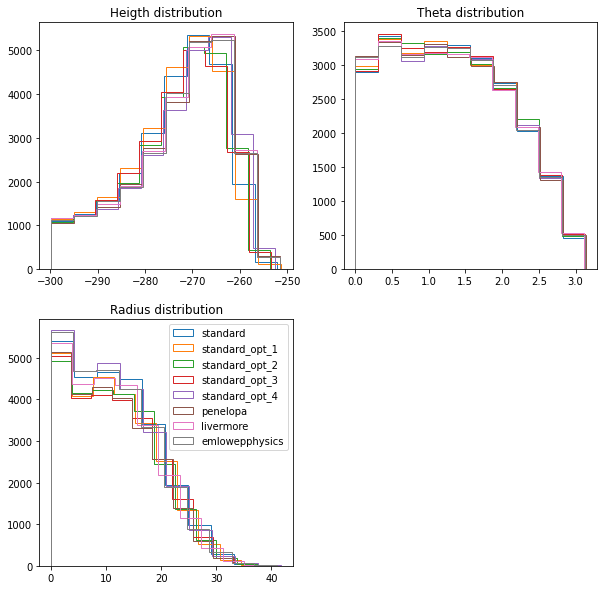

In [41]:
compare_physics(path, 0.0, target_node="gamma")

Electric field: 0.0003
Secondary particle: gamma
Primry particle: e+
model             number        min      max     mean    variance    median     time
--------------  --------  ---------  -------  -------  ----------  --------  -------
standard          9.3676  0.0500025  33.2891  1.93822     11.0839  0.510999  416.178
standard_opt_1    9.3539  0.0500034  32.7713  1.94198     11.0883  0.510999  417.176
standard_opt_2    9.3409  0.0500032  35.477   1.95247     11.2042  0.510999  394.091
standard_opt_3    9.274   0.0500019  32.7932  1.95477     11.2471  0.510999  471.096
standard_opt_4    9.543   0.0500021  35.9572  1.98308     11.6581  0.510999  493.059
penelopa          9.4509  0.0500038  31.8462  2.02501     12.0052  0.513236  842.313
livermore         9.5137  0.0500074  33.9025  2.00156     11.819   0.517111  496.919
emlowepphysics    9.5367  0.0500082  32.8678  1.99413     11.7105  0.514454  490.681


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

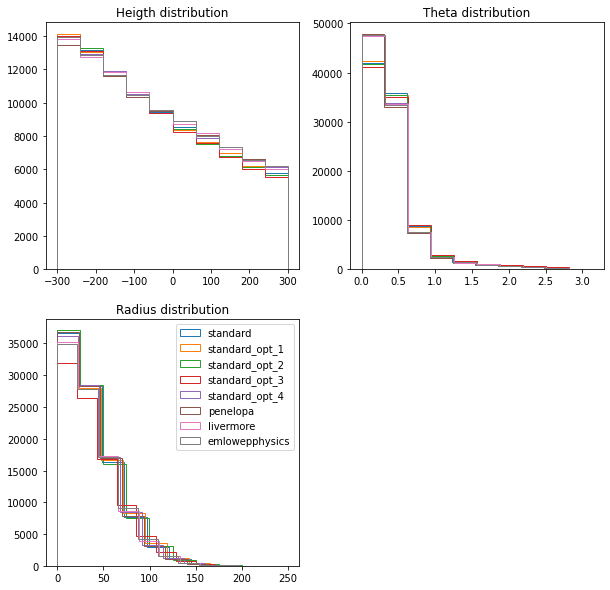

In [42]:
compare_physics(path, 3e-4, target_node="gamma")

Electric field: 0.001
Secondary particle: gamma
Primry particle: e+
model             number        min      max     mean    variance    median      time
--------------  --------  ---------  -------  -------  ----------  --------  --------
standard         18.198   0.0500014  390.762  12.488      851.03    1.36731  3869.57
standard_opt_1   18.1971  0.0500012  368.794  12.4855     844.615   1.36282  1270.64
standard_opt_2   18.3006  0.0500003  375.536  12.4572     840.906   1.36721  2298.19
standard_opt_3   18.1407  0.0500009  391.36   12.42       832.92    1.36977   691.886
standard_opt_4   18.2177  0.0500047  366.656  12.4893     847.005   1.36213   713.885
penelopa         18.1932  0.0500033  370.229  12.4092     831.511   1.36012  1298.12
livermore        18.146   0.050001   393.406  12.4351     845.59    1.37385   668.303
emlowepphysics   17.9961  0.0500029  353.134  12.4502     838.364   1.3678    633.975


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

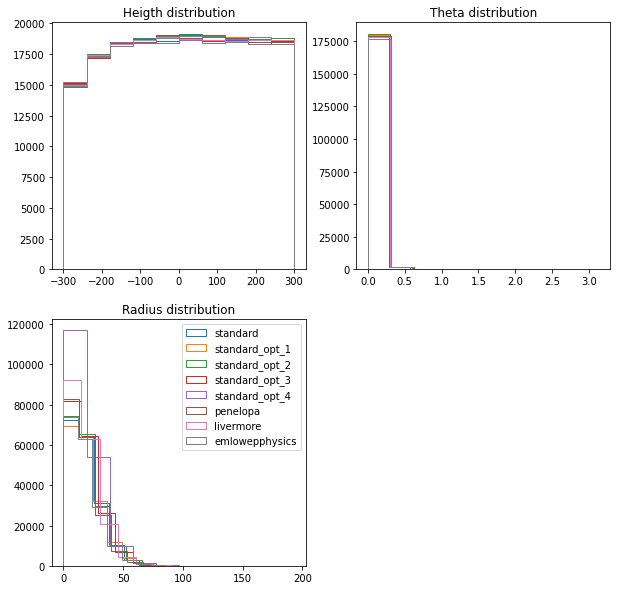

In [43]:
compare_physics(path, 10e-4, target_node="gamma")



In [35]:
def energy_physics(path, field=0.0, target_node="electron"):
    print(f"Electric field: {field}")
    print(f"Secondary particle: {target_node}")
    paths = find_by_meta(path,target_node=target_node, values_gdml_fieldValueZ=field)
    labels = []
    desc = np.zeros(len(paths), dtype=stat_dtype)
    plt.figure(figsize=(10,10))
    first = True
    with tables.open_file(path) as h5file:
        for indx, node_path in enumerate(paths):
            table = h5file.get_node(node_path)
            if first:
                first = False
                print("Primry particle: {}".format(table.attrs["values_macros_particle"]))
            phys = table.attrs["values_macros_physics"]
            data = table.read()
            labels.append(phys)
            plt.title("Energy distribution")
            
            plt.subplot(221)
            indx = data["energy"] < 0.1
            plt.hist(data["energy"][indx], histtype="step", label=phys)
            plt.subplot(222)
            indx = np.logical_and(data["energy"] > 0.1, data["energy"] < 1)
            plt.hist(data["energy"][indx], histtype="step", label=phys)
            plt.subplot(223)
            indx = data["energy"] > 1
            plt.hist(data["energy"][indx], histtype="step", label=phys)
    plt.legend();


Electric field: 0.001
Secondary particle: electron
Primry particle: e-


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

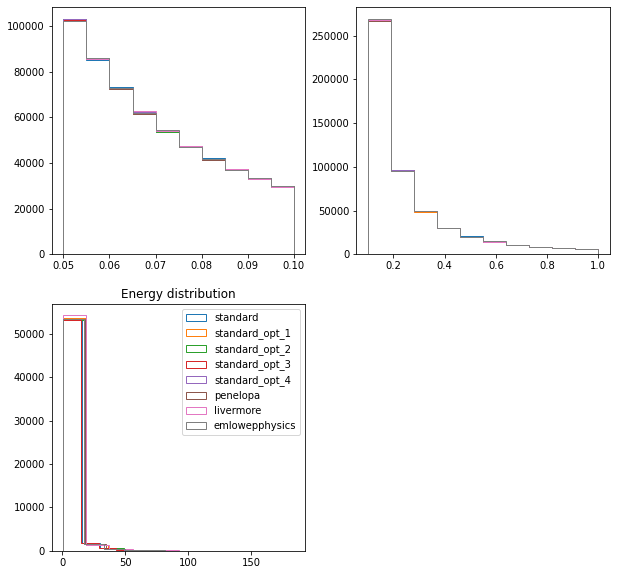

In [36]:
path = "/mnt/storage2/phd/data/thunderstorm/diffModels/electron_0_1e4.hdf5"
energy_physics(path, 10e-4)

Electric field: 0.001
Secondary particle: gamma
Primry particle: e-


/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

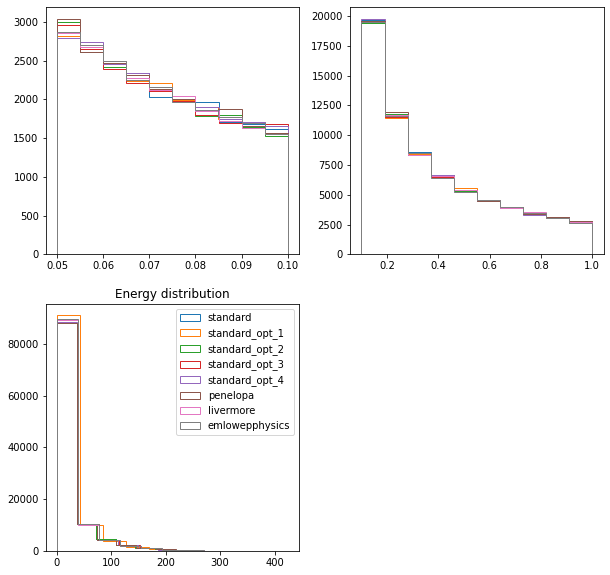

In [37]:
energy_physics(path, 10e-4, target_node="gamma")

* В большом поле почему то быстрее opt4, в меньших быстрее standard (но не сильно можно считать одинаковым),
* Число вторичных электроно мало зависит от энергии первичного электрона
* Число вторичной гаммы растет от энергии первичного электрона
* Число вторичных электронов падает с росто энергии позитрона
* Число вторичных гамма-квантов растет и выходит на насыщение с ростом энергии позитрона
 



